In [8]:
%matplotlib inline 
import numpy as np 
import scipy as sp 
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 
#from pandas.tools.plotting import scatter_matrix
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import string
import math
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

#### Import dataset

In [9]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [10]:
train_data.tail()
train_data.info()

print("-"*40)
test_data.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

##### Data types

There are 5 object features:

- Name: text
- Sex: category
- Ticket: number + string
- Cabin: number + string
- Embarket: category

There are 6 numeric features:

- PassengerId: number
- Pclass: ordinal category
- Age: continous
- SjbSp: dicrete ordinal
- Parch: discrete ordinal
- Fare: continuous

#### Exploratory Data Analysis (EDA)

<Axes: xlabel='Survived', ylabel='count'>

[Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')]

Text(0, 0.5, 'Frequency Count')

Text(0.5, 1.0, 'Count of Survival')

Text(0.0, 274.5, '549(62%)')

Text(1.0, 171.0, '342(38%)')

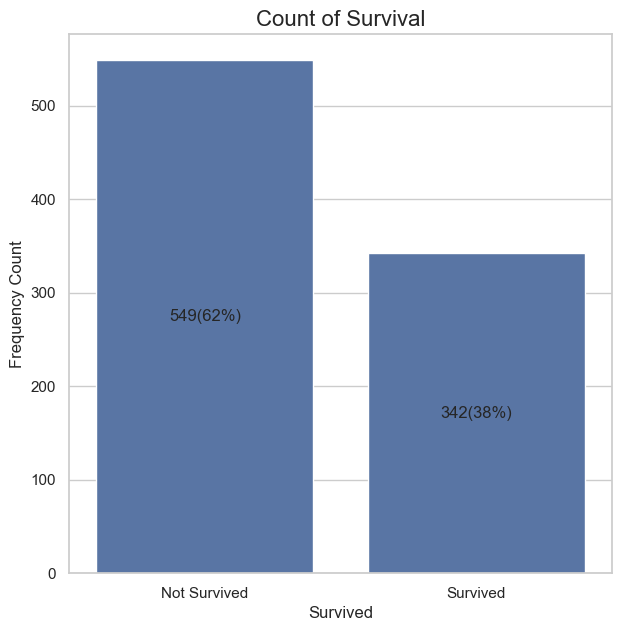

In [12]:
figure, survive_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train_data["Survived"].value_counts().index, y = train_data["Survived"].value_counts(), ax = survive_bar)
survive_bar.set_xticklabels(['Not Survived', 'Survived'])
survive_bar.set_ylabel('Frequency Count')
survive_bar.set_title('Count of Survival', fontsize = 16)

for patch in survive_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    survive_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train_data.Survived))+')',
               horizontalalignment='center', verticalalignment='center')

<Axes: xlabel='Embarked', ylabel='count'>

[Text(0, 0, 'Southampton'), Text(1, 0, 'Chernboug'), Text(2, 0, 'Queenstown')]

Text(0, 0.5, 'Frequency Count')

Text(0.5, 1.0, 'Where did the passengers board the Titanic?')

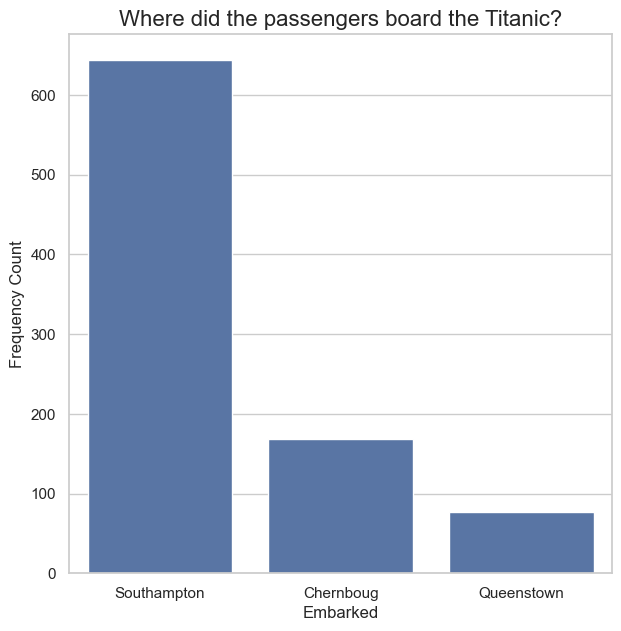

In [13]:
figure, embarked_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train_data["Embarked"].value_counts().index, y = train_data["Embarked"].value_counts(), ax = embarked_bar)
embarked_bar.set_xticklabels(['Southampton', 'Chernboug', 'Queenstown'])
embarked_bar.set_ylabel('Frequency Count')
embarked_bar.set_title('Where did the passengers board the Titanic?', fontsize = 16)

<Axes: xlabel='Survived', ylabel='count'>

Text(0.5, 0, '')

Text(0.5, 1.0, 'Survived Titanic')

Text(0, 0.5, 'Count')

<Axes: xlabel='Pclass', ylabel='count'>

Text(0.5, 0, '')

Text(0.5, 1.0, 'Pclass Titanic')

Text(0, 0.5, 'Count')

<Axes: xlabel='Sex', ylabel='count'>

Text(0.5, 0, '')

Text(0.5, 1.0, 'Sex Titanic')

Text(0, 0.5, 'Count')

<Axes: xlabel='SibSp', ylabel='count'>

Text(0.5, 0, '')

Text(0.5, 1.0, 'SibSp Titanic')

Text(0, 0.5, 'Count')

<Axes: xlabel='Parch', ylabel='count'>

Text(0.5, 0, '')

Text(0.5, 1.0, 'Parch Titanic')

Text(0, 0.5, 'Count')

<Axes: xlabel='Embarked', ylabel='count'>

Text(0.5, 0, '')

Text(0.5, 1.0, 'Embarked Titanic')

Text(0, 0.5, 'Count')

Text(0.0, 274.5, '549(62%)')

Text(1.0, 171.0, '342(38%)')

Text(0.0, 108.0, '216(24%)')

Text(1.0, 92.0, '184(21%)')

Text(2.0, 245.5, '491(55%)')

Text(0.0, 288.5, '577(65%)')

Text(1.0, 157.0, '314(35%)')

Text(0.0, 304.0, '608(68%)')

Text(1.0, 104.5, '209(23%)')

Text(2.0, 14.0, '28(3%)')

Text(3.0, 8.0, '16(2%)')

Text(4.0, 9.0, '18(2%)')

Text(5.0, 2.5, '5(1%)')

Text(6.0, 3.5, '7(1%)')

Text(0.0, 339.0, '678(76%)')

Text(1.0, 59.0, '118(13%)')

Text(2.0, 40.0, '80(9%)')

Text(3.0, 2.5, '5(1%)')

Text(4.0, 2.0, '4(0%)')

Text(5.0, 2.5, '5(1%)')

Text(6.0, 0.5, '1(0%)')

Text(0.0, 322.0, '644(72%)')

Text(1.0, 84.0, '168(19%)')

Text(2.0, 38.5, '77(9%)')

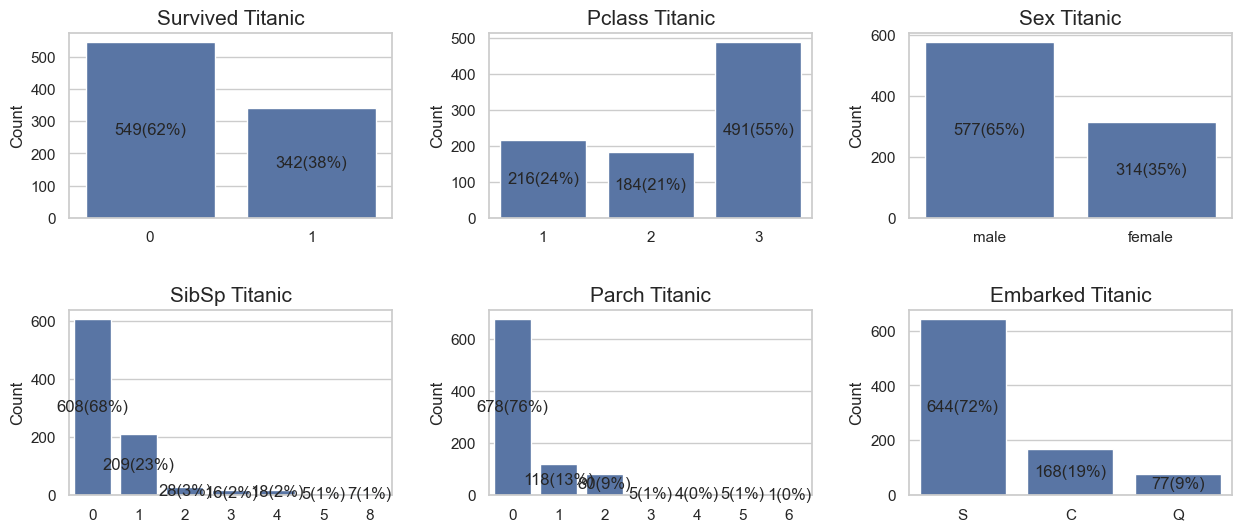

In [14]:
fig, myplot = plt.subplots(figsize = (15,6), nrows = 2,ncols = 3)

categorical_features = ["Survived","Pclass","Sex","SibSp","Parch","Embarked"]

row, col, num_cols = 0,0,3

for u in categorical_features:
    sns.barplot(x = train_data[u].value_counts().index,y = train_data[u].value_counts(), ax  = myplot[row, col])
    myplot[row, col].set_xlabel("")
    myplot[row, col].set_title(u + " Titanic", fontsize = 15)
    myplot[row, col].set_ylabel("Count")
    col = col + 1
    if col == 3:
        col = 0
        row = row + 1


plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.3)
# i put roundbracket around x,y,z to make more sense. just like how x \in [1,2,3] and if x is a tuple or bracket
#we have   u \in [(1,2,3),(2,3,5),...] where u = (x,y,z)

#for each patch in each graph from [0,0] to [1,2], we want to do the following...
for v in range(2):
    for z in range(3):
        for patch in myplot[v,z].patches:
            label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
            label_y = patch.get_y() + patch.get_height()/2
            myplot[v,z].text(label_x, label_y, 
                             str(int(patch.get_height())) + '('+'{:.0%}'.format(patch.get_height()/len(train_data.Survived))+')',
                            horizontalalignment='center', verticalalignment='center')

<Axes: xlabel='Age', ylabel='Density'>

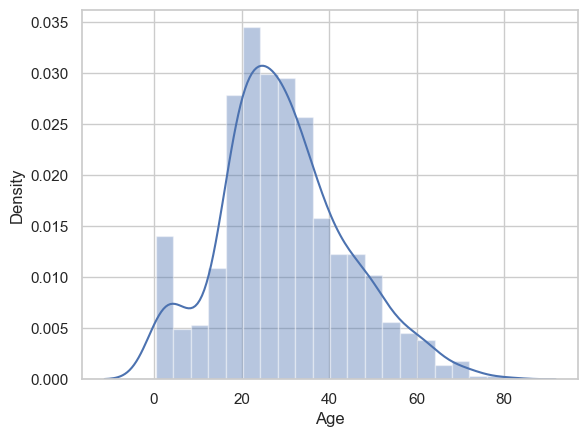

In [16]:
null_ages = pd.isnull(train_data.Age)
known_ages = pd.notnull(train_data.Age)
preimputation = train_data.Age[known_ages]
sns.distplot(preimputation)
#here we show a distribution of ages before imputation.

<Axes: xlabel='Age', ylabel='Density'>

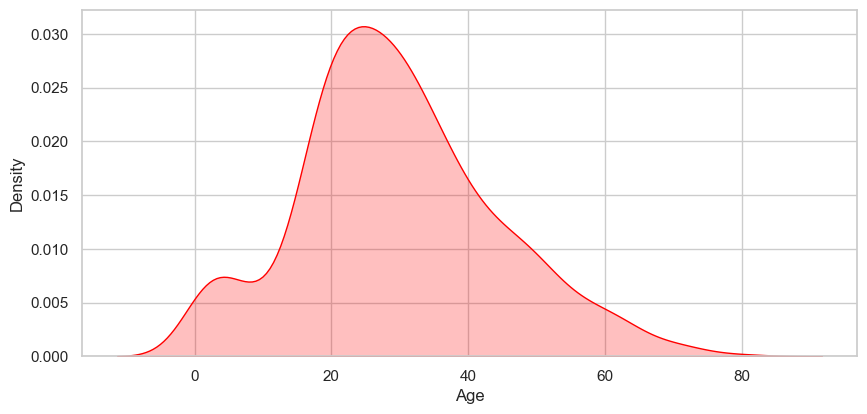

In [17]:
# Explore Age distibution as a whole
figure, myaxis = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train_data["Age"], kernel='gau', ax=myaxis, color="Red", shade=True, legend=True)

In [19]:
def print_percentage(df,col_name,col_values):
    for x in col_values:
        group = df.loc[df[col_name]==x]
        print ('{0} survival rate: {1:.3f}'.format(x, (group['Survived'].sum()/group.shape[0])))

3.2.1 Plot Gender against Survived 

In [21]:
print_percentage(train_data,'Sex',["male","female"])

male survival rate: 0.189
female survival rate: 0.742


<Axes: xlabel='Sex', ylabel='Survived'>

Text(0.5, 1.0, 'Survived/Non-Survived Passenger Gender Distribution')

Text(0.5, 0, 'Sex')

Text(0, 0.5, 'Proportion of passengers survived')

Text(0.0, 0.09445407279029462, '18.891%')

Text(1.0, 0.37101910828025475, '74.204%')

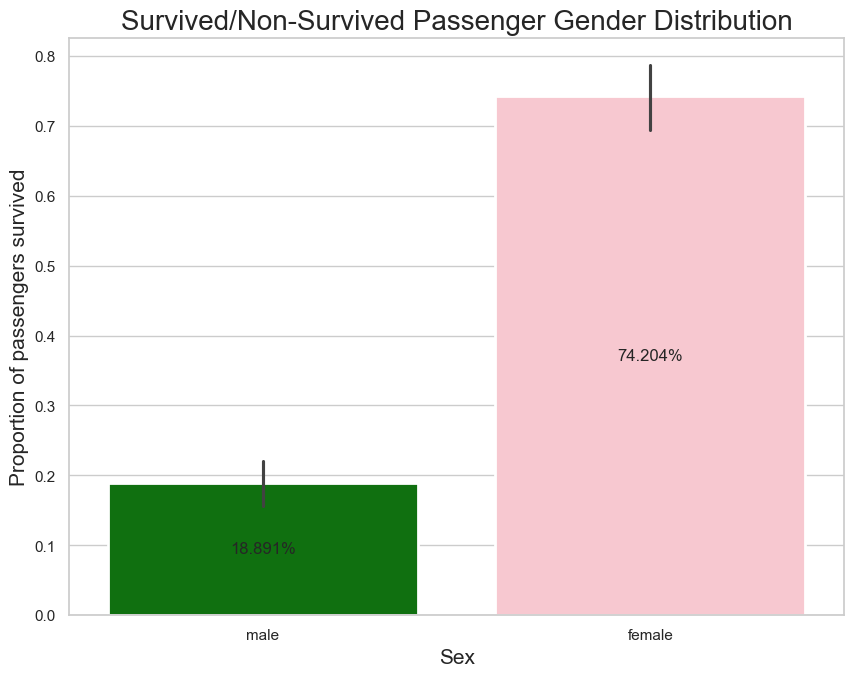

In [22]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))


sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train_data, 
            ax = myaxis,
            estimator = np.mean,
            palette = {'male':"green", 'female':"Pink"},
            linewidth=2)

myaxis.set_title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 20)
myaxis.set_xlabel("Sex",fontsize = 15)
myaxis.set_ylabel("Proportion of passengers survived", fontsize = 15)

for patch in myaxis.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    myaxis.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
                '{:.3%}'.format(patch.get_height()),
               horizontalalignment='center', verticalalignment='center')

<Axes: xlabel='Sex', ylabel='count'>

Text(0.5, 1.0, 'Passenger Gender Distribution - Survived vs Not-survived')

Text(0.5, 0, 'Sex')

Text(0, 0.5, 'Number of Passenger Survived')

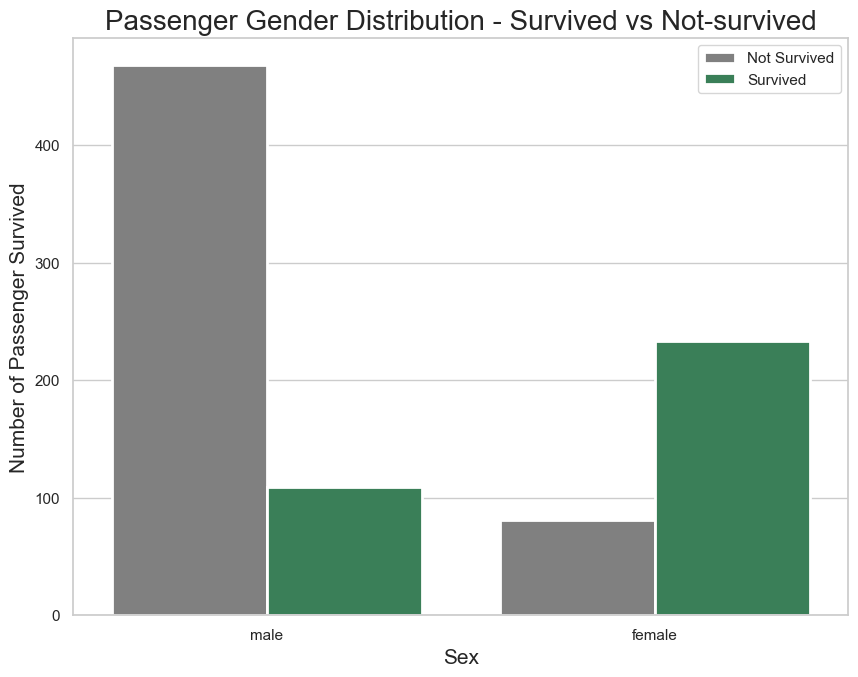

In [23]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train_data, 
                   linewidth=2, 
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Sex", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

3.3.2 Plot Pclass against Survived

In [25]:
print_percentage(train_data,'Pclass',[1,2,3])

1 survival rate: 0.630
2 survival rate: 0.473
3 survival rate: 0.242


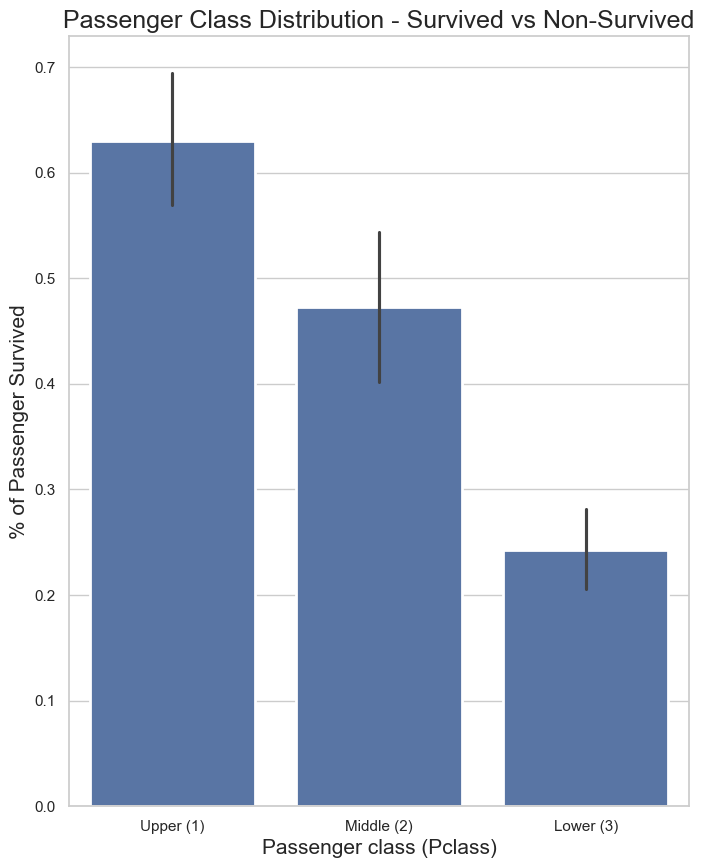

In [26]:
#Plot 1: We can use a bar plot:

figure, pclass_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            estimator = np.mean,
            data=train_data, 
            ax = pclass_bar,
            linewidth=2)
pclass_bar.set_title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 18)
pclass_bar.set_xlabel("Passenger class (Pclass)", fontsize = 15);
pclass_bar.set_ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper (1)', 'Middle (2)', 'Lower (3)']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
pclass_bar.set_xticklabels(labels);

Text(0.5, 0.98, 'How many Men and Women Survived by Passenger Class')

Text(0.0, 0.18442622950819673, '36.885%')

Text(1.0, 0.48404255319148937, '96.809%')

Text(0.0, 0.0787037037037037, '15.741%')

Text(1.0, 0.4605263157894737, '92.105%')

Text(0.0, 0.06772334293948126, '13.545%')

Text(1.0, 0.25, '50.000%')

Text(-0.2, 0.48404255319148937, '96.809%')

Text(0.8, 0.4605263157894737, '92.105%')

Text(1.8, 0.25, '50.000%')

Text(0.20000000000000007, 0.18442622950819673, '36.885%')

Text(1.2000000000000002, 0.0787037037037037, '15.741%')

Text(2.2, 0.06772334293948126, '13.545%')

Text(0.0, 0.0, '0.000%')

Text(0.0, 0.0, '0.000%')

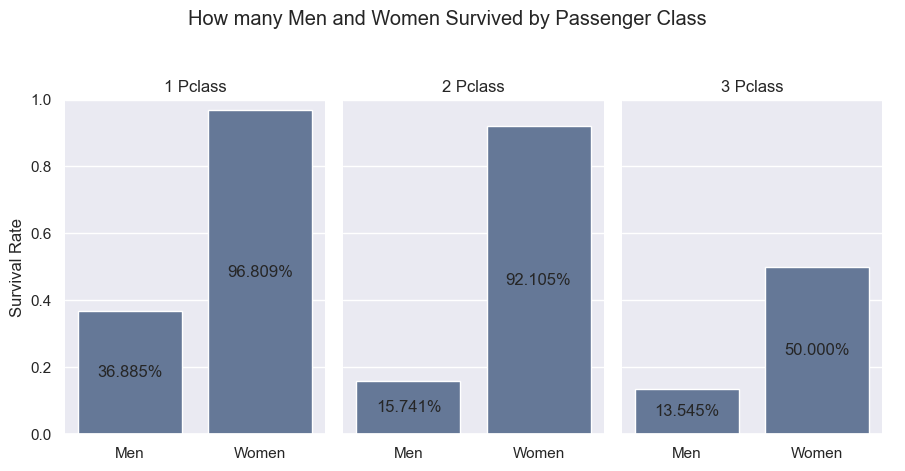

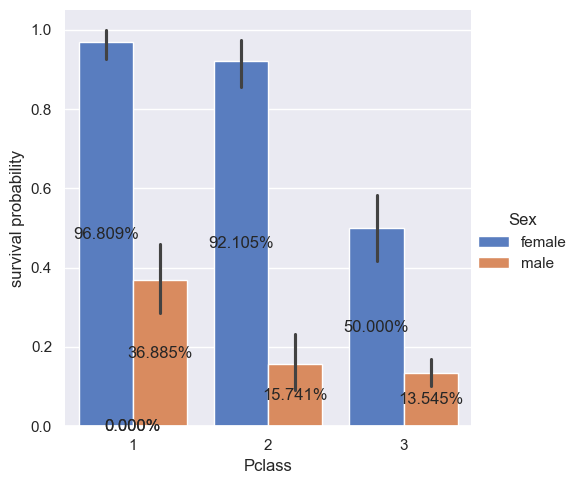

In [35]:
sns.set(font_scale=1)
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                    data=train_data, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

for myaxis in g.axes[0]:
    for patch in myaxis.patches:
        label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
        label_y = patch.get_y() + patch.get_height()/2
        myaxis.text(label_x, label_y,
                    #left - freq below - rel freq wrt population as a percentage
                    '{:.3%}'.format(patch.get_height()),
                   horizontalalignment='center', verticalalignment='center')

#Another plot that gives the exact same result is as follows: It is good to know different variations.


g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=train_data,
                    kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

myaxis = g.ax
for patch in myaxis.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    myaxis.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
                '{:.3%}'.format(patch.get_height()),
               horizontalalignment='center', verticalalignment='center')

In [31]:
print_percentage(train_data,'Embarked',['S','C','Q'])

S survival rate: 0.337
C survival rate: 0.554
Q survival rate: 0.390


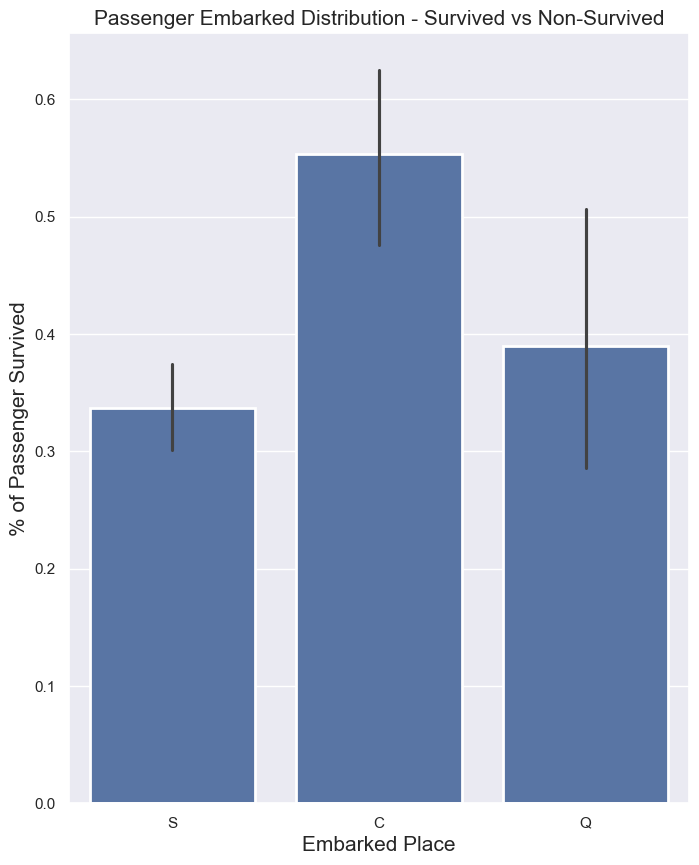

In [32]:
figure, embarked_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Embarked", 
            y = "Survived", 
            estimator = np.mean,
            data=train_data, 
            ax = embarked_bar,
            linewidth=2)
embarked_bar.set_title("Passenger Embarked Distribution - Survived vs Non-Survived", fontsize = 15)
embarked_bar.set_xlabel("Embarked Place", fontsize = 15);
embarked_bar.set_ylabel("% of Passenger Survived", fontsize = 15);

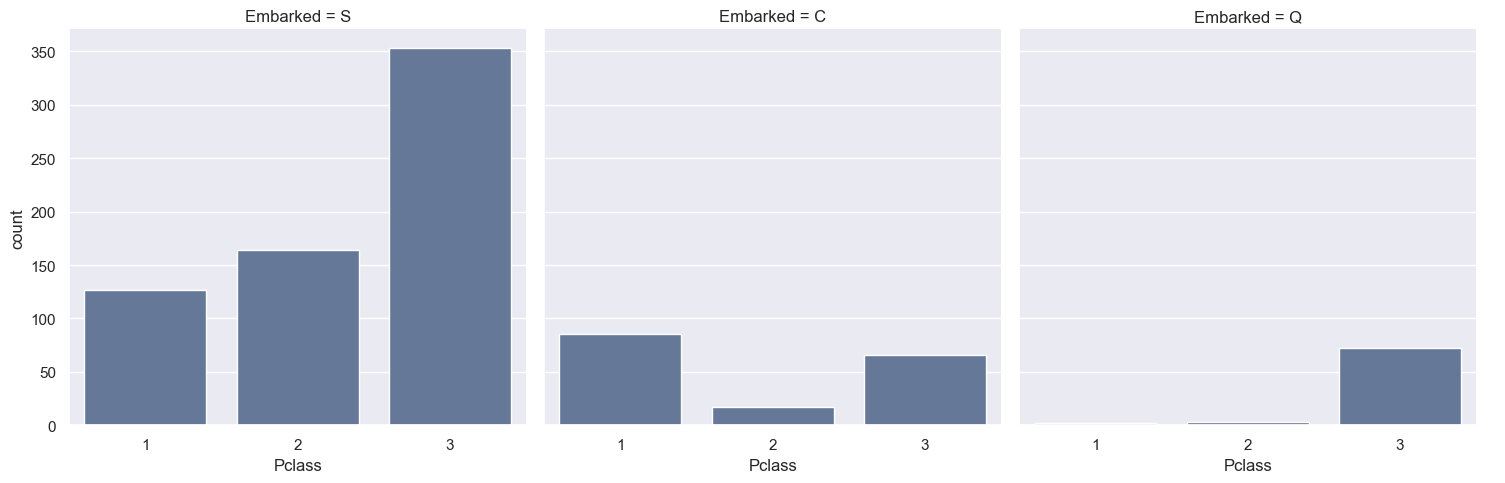

In [36]:
sns.set(font_scale=1)
g = sns.catplot(x="Pclass", col="Embarked",
                    data=train_data, saturation=.5,
                    kind="count", ci=None)

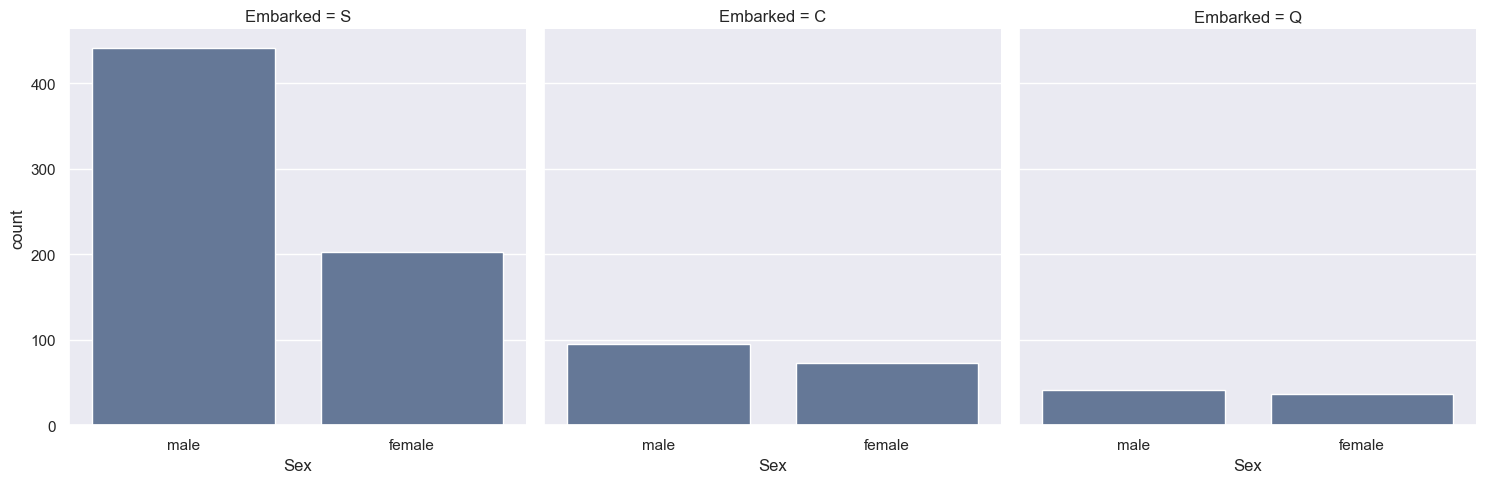

In [37]:
sns.set(font_scale=1)
g = sns.catplot(x="Sex", col="Embarked",
                    data=train_data, saturation=.5,
                    kind="count", ci=None)

<Axes: xlabel='Age', ylabel='Density'>

<Axes: xlabel='Age', ylabel='Density'>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for age of Survived and Not Survived')

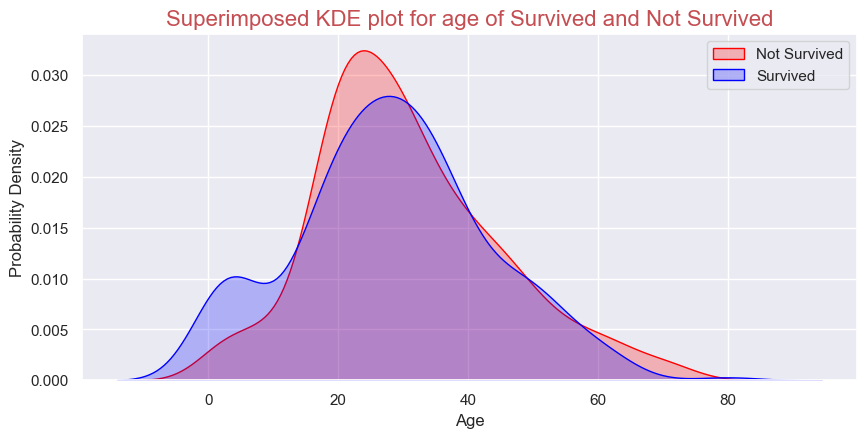

In [40]:
# Explore Age distibution
figure, myaxis = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train_data["Age"][(train_data["Survived"] == 0) & (
    train_data["Age"].notnull())], kernel='gau', ax=myaxis, color="Red", shade=True, legend=True)


# a faster code using loc function is sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')

sns.kdeplot(data=train_data["Age"][(train_data["Survived"] == 1) & (
    train_data["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)

myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["Not Survived", "Survived"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

Text(0.5, 0.98, 'Survived by Sex and Age')

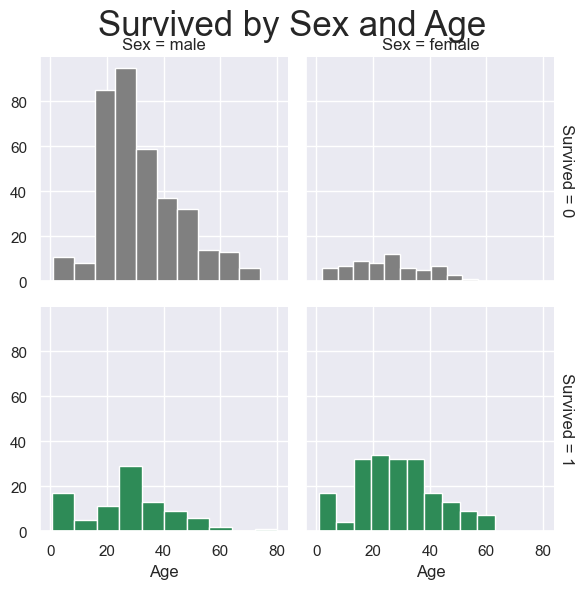

In [42]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train_data, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

Text(0.5, 0.98, 'Survived by Sex and Age')

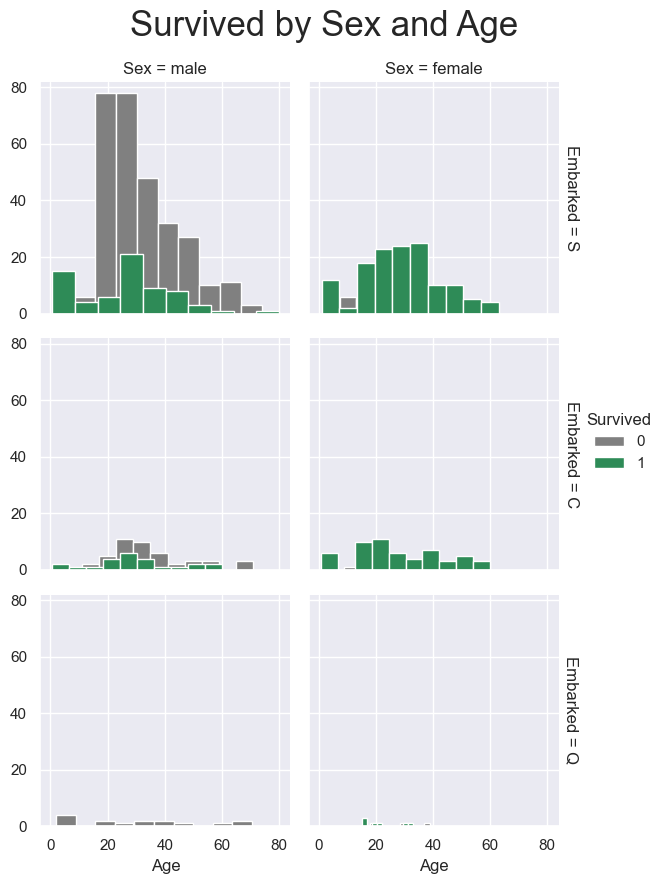

In [43]:
g = sns.FacetGrid(train_data, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

<Axes: xlabel='Age', ylabel='Density'>

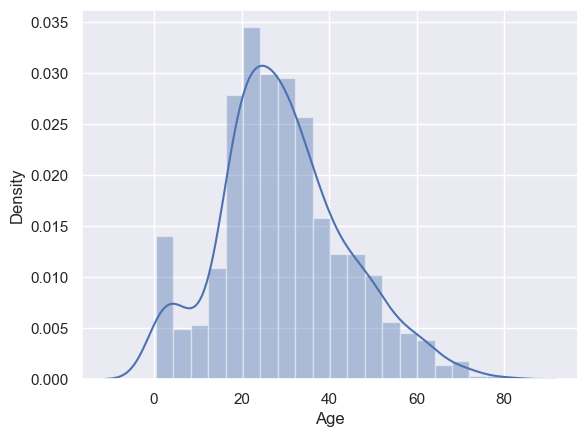

In [44]:
null_ages = pd.isnull(train_data.Age)
known_ages = pd.notnull(train_data.Age)
preimputation = train_data.Age[known_ages]
sns.distplot(preimputation)

<Axes: xlabel='Fare', ylabel='Density'>

<Axes: xlabel='Fare', ylabel='Density'>

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for Fare of Survived and Not Survived')

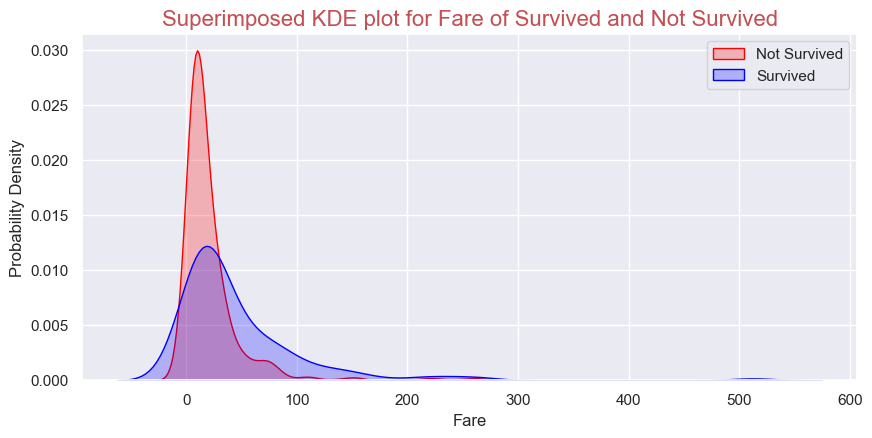

In [45]:
# Explore Age distibution
figure, fare = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train_data.loc[(train_data['Survived'] == 0),'Fare'], kernel='gau', ax=fare, color="Red", shade=True, legend=True)

sns.kdeplot(data=train_data.loc[(train_data['Survived'] == 1),'Fare'], kernel='gau', ax=fare, color="Blue", shade=True, legend=True)

fare.set_xlabel("Fare")
fare.set_ylabel("Probability Density")
fare.legend(["Not Survived", "Survived"], loc='upper right')
fare.set_title("Superimposed KDE plot for Fare of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

<Axes: xlabel='Fare', ylabel='Density'>

<Axes: xlabel='Fare', ylabel='Density'>

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed distribution plot for Fare of Survived and Not Survived')

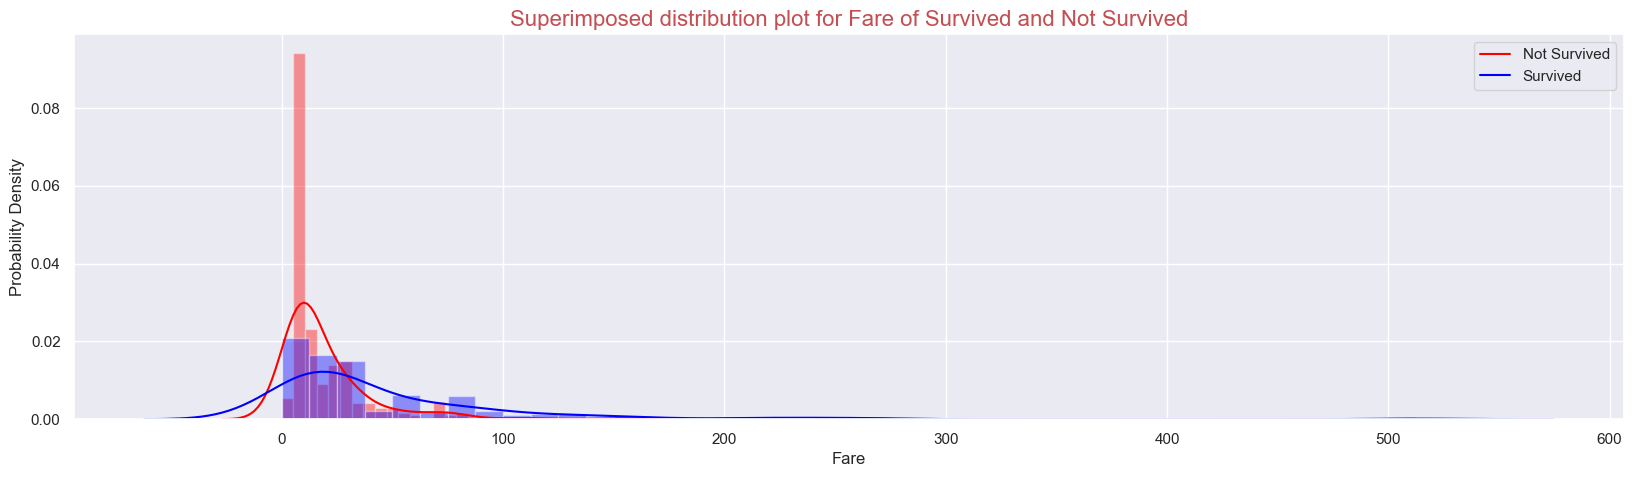

In [46]:
figure, fare = plt.subplots(figsize=(20, 5))
sns.distplot(train_data.loc[(train_data['Survived'] == 0),'Fare'], hist=True, color='red', ax=fare)
sns.distplot(train_data.loc[(train_data['Survived'] == 1),'Fare'], hist=True, color='blue', ax=fare)

fare.set_xlabel("Fare")
fare.set_ylabel("Probability Density")
fare.legend(["Not Survived", "Survived"], loc='upper right')
fare.set_title("Superimposed distribution plot for Fare of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

In [48]:
train_data.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [50]:
print_percentage(train_data,'Parch',[0,1,2,3,4,5,6])

0 survival rate: 0.344
1 survival rate: 0.551
2 survival rate: 0.500
3 survival rate: 0.600
4 survival rate: 0.000
5 survival rate: 0.200
6 survival rate: 0.000


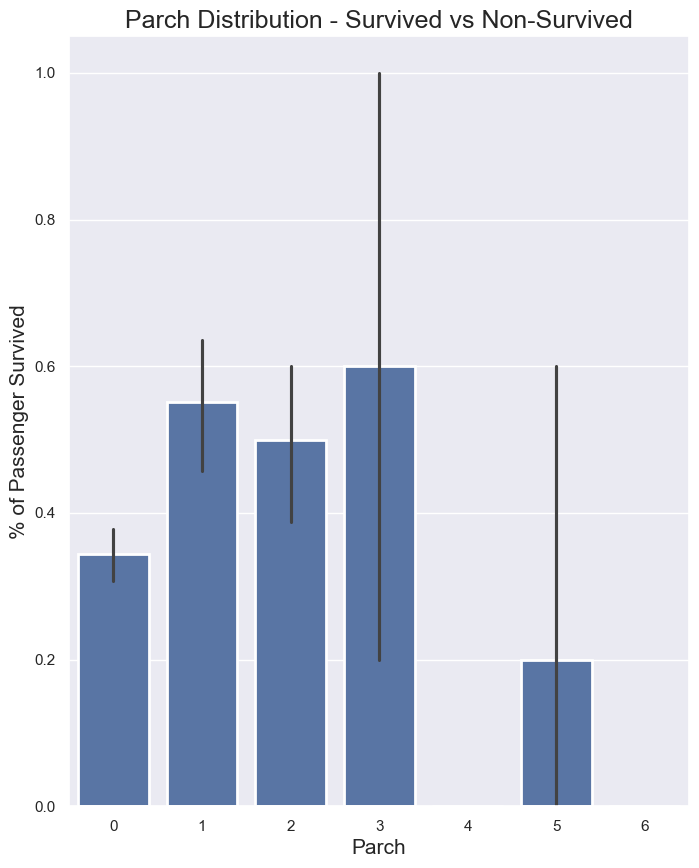

In [51]:
figure, parch_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Parch", 
            y = "Survived", 
            estimator = np.mean,
            data=train_data, 
            ax = parch_bar,
            linewidth=2)
parch_bar.set_title("Parch Distribution - Survived vs Non-Survived", fontsize = 18)
parch_bar.set_xlabel("Parch", fontsize = 15);
parch_bar.set_ylabel("% of Passenger Survived", fontsize = 15);

<Axes: xlabel='Parch', ylabel='count'>

Text(0.5, 1.0, 'Passenger Parch Distribution - Survived vs Not-survived')

Text(0.5, 0, 'Parch')

Text(0, 0.5, 'Number of Passenger Survived')

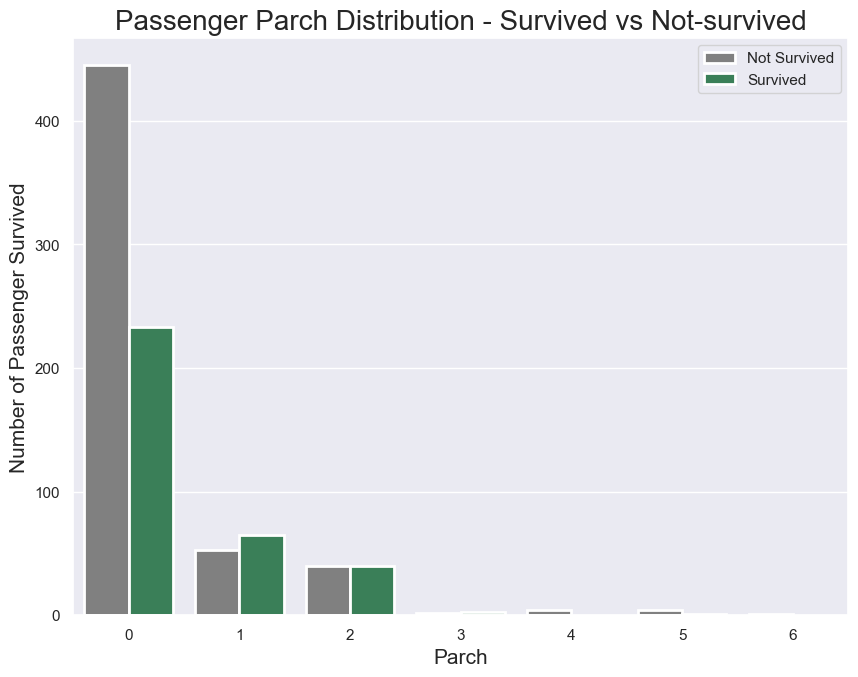

In [52]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "Parch", 
                   hue="Survived",
                   data = train_data, 
                   linewidth=2, 
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Passenger Parch Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Parch", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

In [53]:
train_data.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [54]:
print_percentage(train_data,'SibSp',[0,1,2,3,4,5,8])

0 survival rate: 0.345
1 survival rate: 0.536
2 survival rate: 0.464
3 survival rate: 0.250
4 survival rate: 0.167
5 survival rate: 0.000
8 survival rate: 0.000


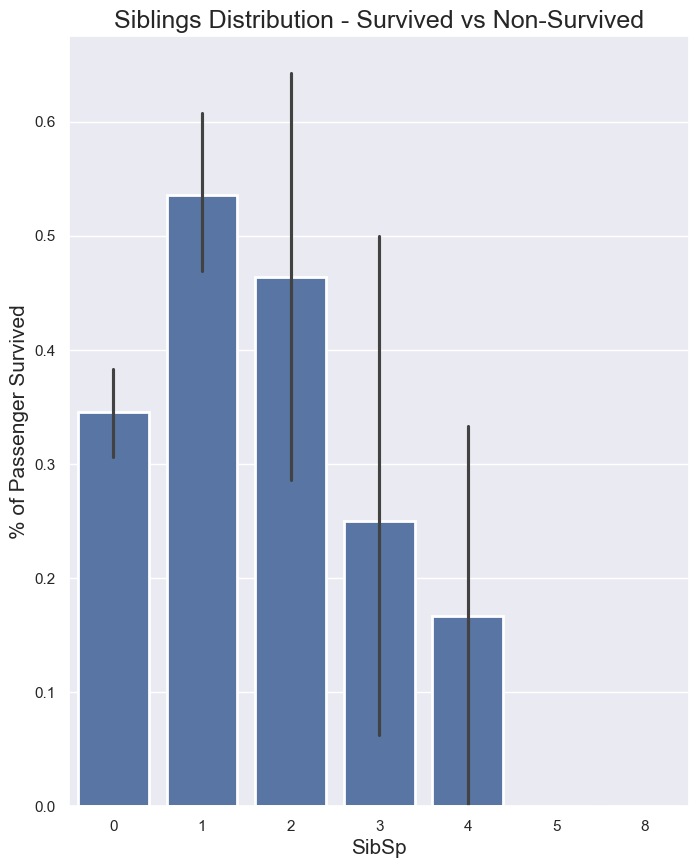

In [55]:
figure, parch_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "SibSp", 
            y = "Survived", 
            estimator = np.mean,
            data=train_data, 
            ax = parch_bar,
            linewidth=2)
parch_bar.set_title("Siblings Distribution - Survived vs Non-Survived", fontsize = 18)
parch_bar.set_xlabel("SibSp", fontsize = 15);
parch_bar.set_ylabel("% of Passenger Survived", fontsize = 15);

<Axes: xlabel='SibSp', ylabel='count'>

Text(0.5, 1.0, 'Siblings Distribution - Survived vs Not-survived')

Text(0.5, 0, 'Siblings')

Text(0, 0.5, 'Number of Passenger Survived')

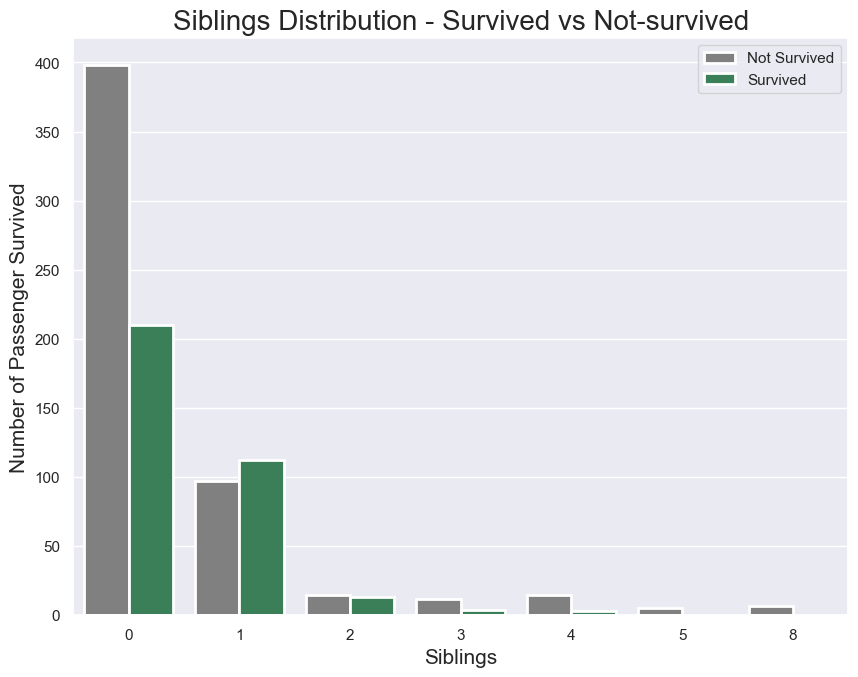

In [56]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "SibSp", 
                   hue="Survived",
                   data = train_data, 
                   linewidth=2, 
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Siblings Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Siblings", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

##### Conclusion of EDA

Continuous Features: There are 2 continuous features Age and Fare, where we see that split points and spikes are present in the graph, unfortunately, there are only 2 of them so we cannot drop them or alter too much. They can be captured easily with a decision tree algorithm, but neural networks may not be able to spot them.

Categorical Features: As we can see, most of the categorical feature has classes that indicates significant survival/non-survival rate. This is a tell tale sign that one-hot encoding may be quite useful here. But also, this project has little categorical variables, and thus one hot encoding usage is not put down by the possible "curse of dimension".